In [29]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, auc, roc_auc_score,roc_curve

In [2]:
data=pd.read_csv('creditcard.csv')

In [3]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
data['normAmount']=StandardScaler().fit_transform(np.array(data['Amount']).reshape(-1,1))

In [9]:
data=data.drop(['Time','Amount'],axis=1)

In [10]:
X=np.array(data.loc[:, data.columns != 'Class'])
y=np.array(data.loc[:, data.columns=='Class'])

In [12]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.30, random_state=0)

In [14]:
# SMOTE
sm=SMOTE(random_state=2)

In [15]:
X_train_res, y_train_res=sm.fit_sample(X_train, y_train.ravel())

In [17]:
X_train.shape

(199364, 29)

In [18]:
X_train_res.shape

(398038, 29)

In [20]:
param={
    'C':np.linspace(1,5,5)
}

In [21]:
lr=LogisticRegression()

In [22]:
clf=GridSearchCV(lr,param,cv=3,verbose=3,n_jobs=-1)

In [23]:
clf.fit(X_train_res,y_train_res.ravel())

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.5min finished


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1., 2., 3., 4., 5.])}, verbose=3)

In [24]:
clf.best_params_

{'C': 2.0}

In [25]:
y_pred=clf.predict(X_test)

In [26]:
cm=confusion_matrix(y_test, y_pred)

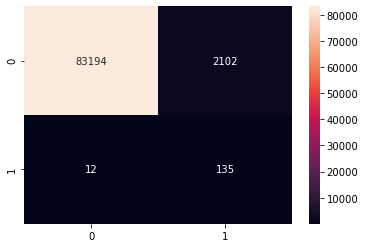

In [27]:
sns.heatmap(cm,fmt='1g',annot=True)

In [28]:
# ROC
y_pred_sample_score=clf.decision_function(X_test)

In [30]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_sample_score)

In [32]:
roc_auc=auc(fpr,tpr)

(-0.1, 1.0)

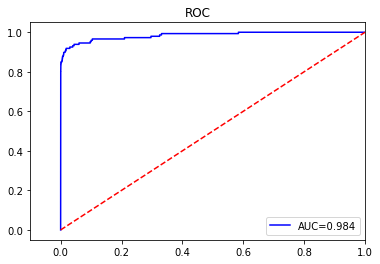

In [33]:
# Plots
plt.title('ROC')
plt.plot(fpr,tpr,'b',label='AUC=%0.3f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])